# Markov Chain Monte Carlo Examples

Created by Xinhong Liu (xliu27@nd.edu)


This example was adapted from:

McClarren, Ryan G (2018). Uncertainty Quantification and Predictive Computational Science: A Foundation for Physical Scientists and Engineers, Chapter 11: Predictive Models Informed by Simulation, Measurement and Surrogates, Springer, https://link.springer.com/chapter/10.1007%2F978-3-319-99525-0_11


In [1]:
## import all needed Python libraries here
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

## Markov Chain
A Markov Chain is a sequence ${x_1,x_2,...x_t}$ for a random variable $X$ that satisfies the following property

\begin{equation}
p(x_{t+1}|x_t,x_{t-1},...x_1) = p(x_{t+1}|x_t)
\end{equation}

which means given the present state, the probability model for the future state is independent of the past states if $t$ is large enough



## Metropolis-Hastings for MCMC



The Metropolis-Hastings algorithm (MH） enable us to evaluate the product of the prior and the likelihood function without calculating the normalization constant. It is a rejection sampling technique that uses a distribution that is not the target distribution to generate proposed samples

\begin{equation}
\hat{p}(x_{t+1}) = \int_X p(x_{t+1}|x_t) p(x_t) dx_t
\end{equation}

### Algorithm
1. Choose initial state $x_0$ and a proposal density $q(x_{t+1}|x_t)$
2. Randomly simulate candidate sample $y$ from $q(x_{t+1}|x_t)$ and $u$ from $U(0,1)$
3. Calculate the acceptance ratio

\begin{equation}
\alpha(x_t,y) = min \left(1, \frac{\hat{p}(y) q(x_t|y)}{\hat{p}(x_t) q(y|x_t)}\right)
\end{equation}

4. Set $x_{t+1} = y$ if $\alpha(x_t,y) \geq u$,  $x_{t+1} = x_t$ otherwise

Then the stationary pdf for the Markov Chain is the target probability

### Implement

Following example is using MCMC to approximate a Beta distribution with a proposal density $N(2,1)$

In [2]:
def beta_mcmc(N, x0, sigma, a, b):
    '''
    Use Markov Chain Monte Carlo to approximate a Beta distribution with a proposal density N(x0,1).
    
    Arguments:
    N: total number of samples needed
    a,b: alpha and beta values for beta distribution
    
    Returns:
    states: stable
    acc: acceptance rate
    
    '''
    states = []
    acc = 0 # number of accepted samples
    x = x0 # initial state - starting point for Markov chain
    for i in range(0,N):
        states.append(x) # append state vector
        y = proposal_dist(x,sigma) # candidate sample
        alpha = min(beta_dist(y,a,b)/beta_dist(x,a,b),1) # acceptance probability
        u = np.random.uniform(0,1) # generate uniform random number
        # check if sample is accepted
        if u <= alpha:
            x = y # generated sample=candidate sample
            acc = acc + 1 # update accepted candidate sample count
    acc_ratio = acc/(N-1)
    return states, acc_ratio   


D:\App\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
D:\App\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


Number of samples =  100000
Acceptance ratio =  0.27441274412744127


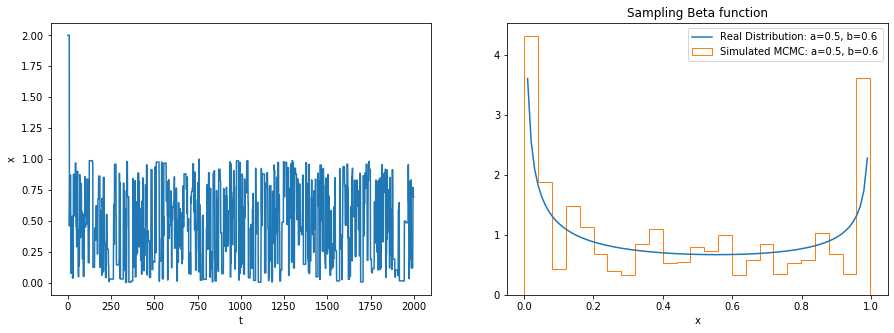

D:\App\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


Number of samples =  100000
Acceptance ratio =  0.21848218482184822


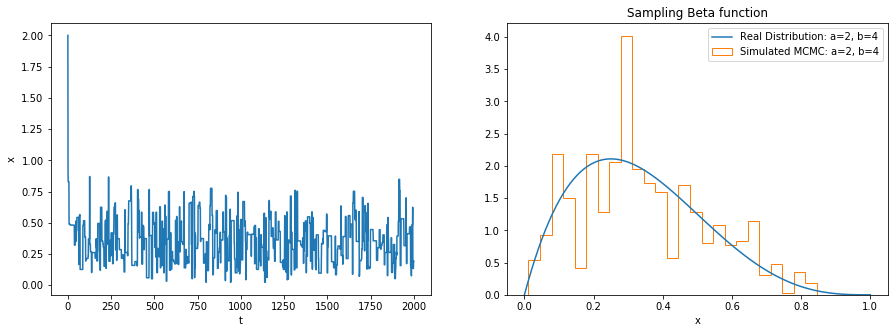

In [3]:
# Beta distribution - target distribution
def beta_dist(x, a, b):
    return stats.beta(a, b).pdf(x)

# proposal distribution
def proposal_dist(x,sigma):
    return np.random.normal(x,sigma) 

def plot_beta(N, x0, sigma, a, b):
    Ly = []
    Lx = []
    i_list = np.mgrid[0:1:100j]
    for i in i_list:
        Lx.append(i)
        Ly.append(beta_dist(i, a, b))
    t = np.linspace(0,2000,2001)
    states,acc_ratio = beta_mcmc(N, x0, sigma, a, b)
    # print results on screen
    print("Number of samples = ",N)
    print("Acceptance ratio = ",acc_ratio)
    # plot results
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(t, states[:2001], label="\sigma = "+str(sigma))
    plt.xlabel("t")
    plt.ylabel("x")
    
    plt.subplot(1,2,2)
    plt.plot(Lx, Ly, label="Real Distribution: a="+str(a)+", b="+str(b))
    plt.hist(states[-1000:],density=True,bins=25, histtype='step',label="Simulated MCMC: a="+str(a)+", b="+str(b))
    plt.xlabel("x")
    plt.title("Sampling Beta function")
    plt.legend(loc="best")
    plt.show()

N = 100000
plot_beta(N, 2, 1,  0.5, 0.6)

plot_beta(N, 2, 1,  2, 4)